In [1]:
#Ans1:Regularization in deep learning is a technique used to prevent overfitting and improve the generalization of neural networks. 

In [2]:
#ANs2:Bias and Variance is compliment to each other in which the one is increase then other decrease so Regularisation help to achieve the finding the right balance of values is known as the Bias-Variance Tradeoff. 

In [3]:
#Ans3:L1 normalisation is the ridge regression and to reduce the overfitting and L2 is the Lasso Regression which is use to feature Selection 
#L1 Regularsation:
#Cost_Function=1/Nsummation(y^-y)^2+lambda(wi)^2
#L2 Regularsion:
#cost Function=1/N summation(y^-y)^2+lambda|slope|

In [4]:
#Ans4:Regularization will help select a midpoint between the first scenario of high bias and the later scenario of high variance. This ideal goal of generalization in terms of bias and variance is a low bias and a low variance which is near impossible or difficult to achieve. Hence, the need of the trade-off.

In [18]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [10]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [12]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
y_train_full[0]

5

In [14]:
X_train_full[0].shape

(28, 28)

In [15]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000]/255.,y_train_full[5000:]/255.

In [16]:
X_test=X_test/255.

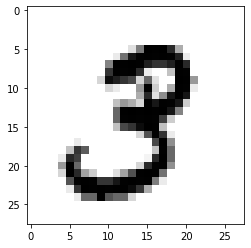

In [26]:
plt.imshow(X_train[1],cmap='binary')

In [65]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout,Dense,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential

In [66]:
model=Sequential()

In [67]:
model.add(Flatten(input_shape=[28,28],name="inputLayer"))

In [68]:
model.add(Dense(300,activation='relu',name="hiddenlayer1",kernel_regularizer=regularizers.L2(1e-4)))

In [69]:
model.add(BatchNormalization())

In [70]:
model.add(Dense(100,activation='relu',name="hiddenLayer2"))

In [71]:
model.add(Dropout(0.2))

In [72]:
model.add(Dense(10,activation='softmax',name='outputLayer'))

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_2 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                      

In [74]:
Loss='sparse_categorical_crossentropy'
optimizer="SGD"
metrics=['accuracy']
model.compile(loss=Loss,optimizer=optimizer,metrics=metrics)

In [75]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0683 - accuracy: 0.0986 - val_loss: 0.0437 - val_accuracy: 0.0958
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.0990 - val_loss: 0.0431 - val_accuracy: 0.0958
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.0990 - val_loss: 0.0427 - val_accuracy: 0.0958
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0429 - accuracy: 0.0990 - val_loss: 0.0423 - val_accuracy: 0.0958
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0425 - accuracy: 0.0990 - val_loss: 0.0420 - val_accuracy: 0.0958
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.0990 - val_loss: 0.0417 - val_accuracy: 0.0958
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0418 - accuracy: 0.0990 - val_loss: 0.0414 - val_accuracy:

In [59]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 11.9797 - accuracy: 0.0980


[11.979654312133789, 0.09799999743700027]

In [47]:
#Ans5:Basically Droup is used to deactivate the neuron so that the model will not overfit ,It increase the accuracy of model 

In [60]:
#Ans6:If the data is fit into model then the early stopping is used to stop the futher train if their accuracy is not increase 

In [61]:
#Ans7: Batch Normalization acts as a regularizer by adding some noise to the activations during training. This noise helps to reduce overfitting by reducing the sensitivity of the network to the specific values of the inputs. It makes the network more robust and less prone to memorizing the training data.

In [89]:
#ANs8:With DropOut the accuracy is 98.6% ans without the Dropout accuracy is 98%

In [77]:
models=Sequential()

In [78]:
models.add(Flatten(input_shape=[28,28],name="inputLayer"))

In [79]:
models.add(Dense(300,activation='relu',name="hiddenlayer1",kernel_regularizer=regularizers.L2(1e-4)))

In [80]:
models.add(BatchNormalization())

In [82]:
models.add(Dense(100,activation='relu',name="hiddenLayer2"))

In [83]:
models.add(BatchNormalization())

In [84]:
models.add(Dense(10,activation='softmax',name='outputLayer'))

In [85]:
models.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_3 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 outputLayer (Dense)         (None, 10)               

In [86]:
Loss='sparse_categorical_crossentropy'
optimizer="SGD"
metrics=['accuracy']
models.compile(loss=Loss,optimizer=optimizer,metrics=metrics)

In [87]:
models.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1859 - accuracy: 0.0957 - val_loss: 0.0485 - val_accuracy: 0.0958
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0463 - accuracy: 0.0990 - val_loss: 0.0449 - val_accuracy: 0.0958
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0444 - accuracy: 0.0990 - val_loss: 0.0438 - val_accuracy: 0.0958
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0435 - accuracy: 0.0990 - val_loss: 0.0431 - val_accuracy: 0.0958
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0429 - accuracy: 0.0990 - val_loss: 0.0426 - val_accuracy: 0.0958
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0424 - accuracy: 0.0990 - val_loss: 0.0422 - val_accuracy: 0.0958
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0420 - accuracy: 0.0990 - val_loss: 0.0418 - val_accuracy:

In [88]:
models.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 9.8873 - accuracy: 0.0980


[9.887301445007324, 0.09799999743700027]

In [ ]:
#Ans9: